In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")


In [2]:

# Cargar el dataset de diabetes
file_path = 'diabetes.csv'  # Asegúrate de tener este archivo en el mismo directorio
diabetes_df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para explorarlo
diabetes_df.head()

# Análisis exploratorio
print(diabetes_df.info())
print(diabetes_df.describe())

# Verificar la presencia de valores nulos
print(diabetes_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

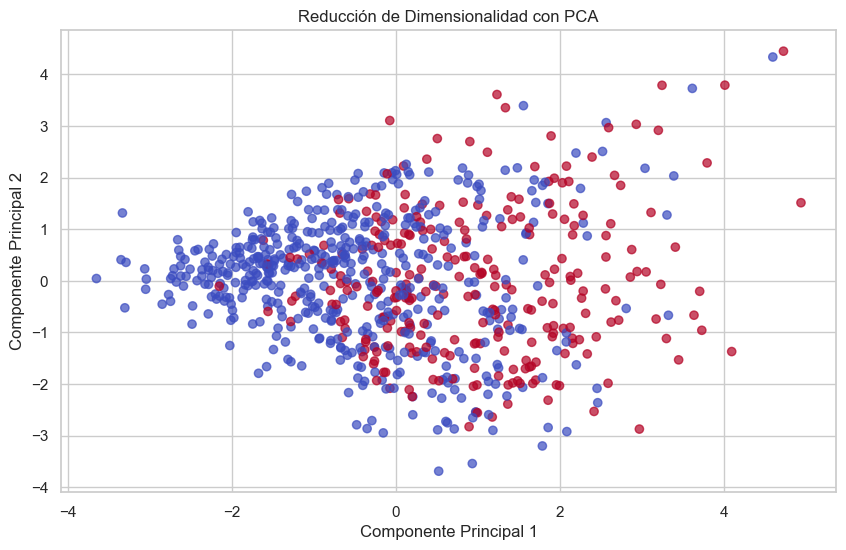

In [3]:

# Imputación de valores cero con la mediana para las columnas clave
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_to_impute] = diabetes_df[columns_to_impute].replace(0, diabetes_df[columns_to_impute].median())

# Separación de características y la variable objetivo
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de la reducción de dimensionalidad
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [4]:

# División del dataset en diferentes tamaños
datasets = {
    '1000 samples': X_pca[:1000], 
    '25000 samples': np.tile(X_pca, (25, 1))[:25000], 
    '250000 samples': np.tile(X_pca, (250, 1))[:250000]
}
labels = {
    '1000 samples': y[:1000], 
    '25000 samples': np.tile(y, 25)[:25000], 
    '250000 samples': np.tile(y, 250)[:250000]
}

# Configuración de modelos
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'SVM': SVC(kernel='linear', C=1),
    'ANN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
}

# Métricas
metrics = ['euclidean', 'manhattan', 'cosine']

# Función para entrenar y evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, conf_matrix


In [ ]:

# Resultados de los modelos
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    results[model_name] = {}
    
    for dataset_name, X_data in datasets.items():
        X_train, X_test, y_train, y_test = train_test_split(X_data, labels[dataset_name], test_size=0.3, random_state=42)
        
        accuracies = []
        reports = []
        confusion_matrices = []
        
        for metric in metrics:
            print(f"  Using metric: {metric}")
            if model_name == 'KNN':
                model.set_params(metric=metric)
            
            accuracy, report, conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test)
            accuracies.append(accuracy)
            reports.append(report)
            confusion_matrices.append(conf_matrix)
        
        results[model_name][dataset_name] = {
            'accuracy': accuracies,
            'report': reports,
            'confusion_matrix': confusion_matrices
        }

# Mostrar los resultados
results


Evaluating KNN...
  Using metric: euclidean
  Using metric: manhattan
  Using metric: cosine
  Using metric: euclidean
  Using metric: manhattan
  Using metric: cosine
  Using metric: euclidean
  Using metric: manhattan
  Using metric: cosine
Evaluating SVM...
  Using metric: euclidean
  Using metric: manhattan
  Using metric: cosine
  Using metric: euclidean
  Using metric: manhattan
  Using metric: cosine
  Using metric: euclidean


In [ ]:

# Visualización de los resultados
for model_name, model_results in results.items():
    for dataset_name, dataset_results in model_results.items():
        plt.figure(figsize=(10, 6))
        plt.bar(metrics, dataset_results['accuracy'], color='skyblue')
        plt.title(f'Precisión del modelo {model_name} en {dataset_name}')
        plt.xlabel('Métrica')
        plt.ylabel('Precisión')
        plt.show()
